## Problem Statement & Objective
We have been provided with two datasets, one comprises information about Orders and the second one comprises of information about Customers.
1. We have to perform Analysis on the Orders Data and Customer Data while touching upon monthly revenues, users, monthly revenue per user etc.
2. We have to prepare an analysis showing how many users placed a Purchase order, while how many actually converted bifurcated by
    - Month
    - Customer Profession
3. We have prepare a 'COHORT analysis' showing the purchase pattern of users by month

## Importing Necessary Libraries

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [119]:
# Reading Csv Data into Pandas Dataframes for further Data Manipulations
df_customer = pd.read_csv("Case_Study_Customer_Data.csv")
df_order = pd.read_csv("Case_Study_Orders_Data.csv")

In [120]:
# Viewing the Data 
print("Customer Data:")
print(df_customer.head(10))

print("Order Data:")
print(df_order.head(10))

Customer Data:
    Cust Id  Customer Created Date     Week     Cust Profession
0  6X894534  01 Jan, 2021 00:23:41  W1,2021  Insurance Agent   
1  8WTK1802  01 Jan, 2021 01:16:11  W1,2021  Sales Professional
2  0WWO4742  01 Jan, 2021 06:19:00  W1,2021  Small Merchant    
3  V4OO4168  01 Jan, 2021 06:32:11  W1,2021  Finance Agent     
4  Z8EA4622  01 Jan, 2021 08:42:21  W1,2021  BFSI Professional 
5  P3P11239  01 Jan, 2021 10:59:06  W1,2021  Finance Agent     
6  DVU07776  01 Jan, 2021 12:06:53  W1,2021  Sales Professional
7  IMEE2234  01 Jan, 2021 12:36:04  W1,2021  Sales Professional
8  347L3208  01 Jan, 2021 12:46:06  W1,2021  Small Merchant    
9  7TG30409  01 Jan, 2021 13:06:58  W1,2021  BFSI Professional 
Order Data:
       Order No   Cust ID        Order Date Order Status  Order Amount
0  4.260000e+18  6X894534  2001-01-21 00:36  Other       NaN          
1  4.260000e+18  0WWO4742  2001-01-21 06:24  Other       NaN          
2  4.260000e+18  V4OO4168  2001-01-21 06:47  Other      

## Data Cleaning & Feature Engineering 

In [121]:
# Checking for Missing/Null Values 
print("Customer Data Missing Values:")
print(df_customer.isnull().sum())
print("\n")
print("Order Data Missing Values:")
print(df_order.isnull().sum())

Customer Data Missing Values:
Cust Id                  0 
Customer Created Date    0 
Week                     0 
Cust Profession          42
dtype: int64


Order Data Missing Values:
Order No        0    
Cust ID         0    
Order Date      0    
Order Status    0    
Order Amount    25920
dtype: int64


In [122]:
# In order to maintain the Data Integrity and accuracy in further analysis, and to avoid certain bias later; 
# We will replace the Null values in the Cust Profession Column with 'Others'.
df_customer['Cust Profession'].fillna('Other', inplace=True)

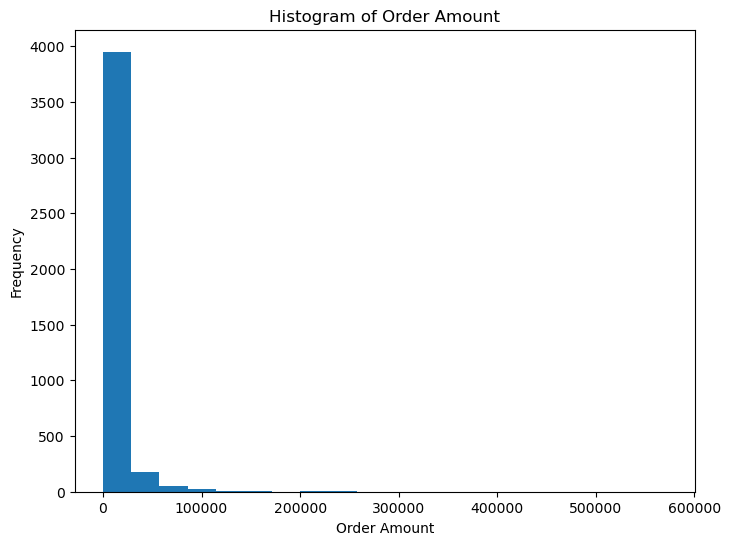

Max Order Amount: 571698.0
Min Order Amount: 0.0
Mean Order Amount: 8125.367598294647
Median Order Amount: 1581.5


In [123]:
# Visualising Outliers in Order amount to avoid biasing
plt.figure(figsize=(8, 6))
plt.hist(df_order['Order Amount'], bins=20)
plt.title('Histogram of Order Amount')
plt.xlabel('Order Amount')
plt.ylabel('Frequency')
plt.show()

# Checking the MAX and MIN values in Order Amount
max_order_amount = df_order['Order Amount'].max()
min_order_amount = df_order['Order Amount'].min()
print("Max Order Amount:", max_order_amount)
print("Min Order Amount:", min_order_amount)

# Calculating Mean for Order Amount
mean_order_amount = df_order['Order Amount'].mean()
print("Mean Order Amount:", mean_order_amount)

# Calculating the Median for Order Amount
median_order_amount = df_order['Order Amount'].median()
print("Median Order Amount:", median_order_amount)

In [124]:
# Since Extemely high values in Order amount could disproportionately influence the mean.
# We will impute the NUll values in the Order amount with Median.
df_order['Order Amount'].fillna(median_order_amount, inplace=True)

In [125]:
# Validating the Null Values
print("Customer Data Missing Values:")
print(df_customer.isnull().sum())
print("\n")
print("Order Data Missing Values:")
print(df_order.isnull().sum())

Customer Data Missing Values:
Cust Id                  0
Customer Created Date    0
Week                     0
Cust Profession          0
dtype: int64


Order Data Missing Values:
Order No        0
Cust ID         0
Order Date      0
Order Status    0
Order Amount    0
dtype: int64


In [126]:
# Convert datetime values in string format
df_customer['Customer Created Date'] = pd.to_datetime(df_customer['Customer Created Date'], errors='coerce')
df_order['Order Date'] = pd.to_datetime(df_order['Order Date'], errors='coerce')

# Convert datetime values in numerical format
df_customer['Customer Created Date'] = pd.to_datetime(df_customer['Customer Created Date'], unit='s', errors='coerce')
df_order['Order Date'] = pd.to_datetime(df_order['Order Date'], unit='s', errors='coerce')

# Fill NaN values with original datetime values (if applicable)
df_customer['Customer Created Date'].fillna(df_customer['Customer Created Date'], inplace=True)
df_order['Order Date'].fillna(df_order['Order Date'], inplace=True)

print(df_customer['Customer Created Date'].head(5))
print(df_order['Order Date'].head(5))

0   2021-01-01 00:23:41
1   2021-01-01 01:16:11
2   2021-01-01 06:19:00
3   2021-01-01 06:32:11
4   2021-01-01 08:42:21
Name: Customer Created Date, dtype: datetime64[ns]
0   2001-01-21 00:36:00
1   2001-01-21 06:24:00
2   2001-01-21 06:47:00
3   2001-01-21 06:51:00
4   2001-01-21 09:02:00
Name: Order Date, dtype: datetime64[ns]


In [127]:
# Since we need to prepare Analysis on the Orders Data and Customer Data while touching upon monthly revenues, users, monthly revenue per user etc.
# We would need to create new features in our dataset for 'MONTH' 
df_customer['Month'] = df_customer['Customer Created Date'].dt.to_period('M')
df_order['Month'] = df_order['Order Date'].dt.to_period('M')
print(df_customer['Month'].head(5))
print(df_order['Month'].head(5))

0    2021-01
1    2021-01
2    2021-01
3    2021-01
4    2021-01
Name: Month, dtype: period[M]
0    2001-01
1    2001-01
2    2001-01
3    2001-01
4    2001-01
Name: Month, dtype: period[M]


## Order Data Analysis
Analysis on Monthly revenues, users, monthly revenue per user and more.

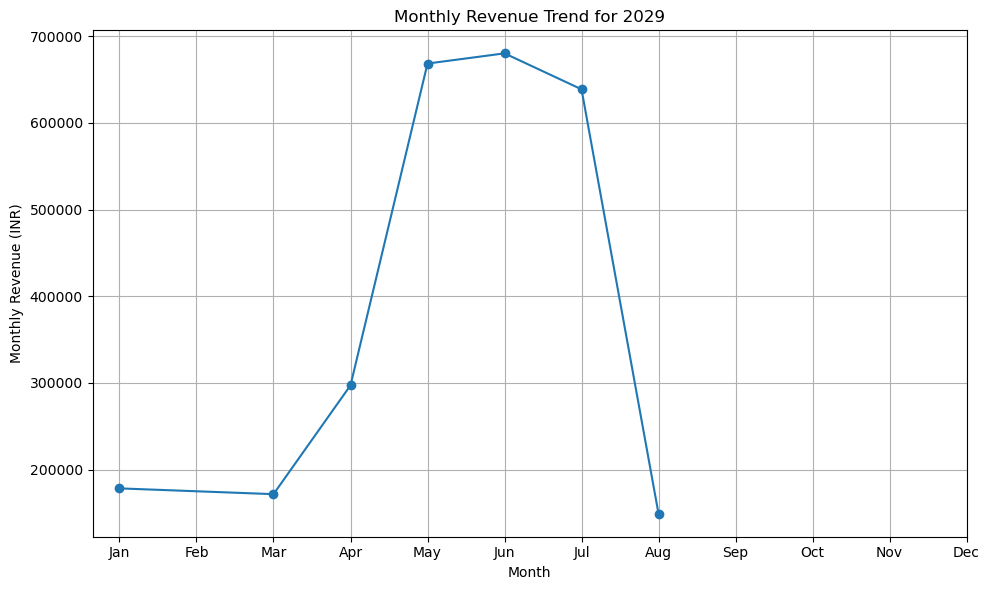

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Identify the latest year
latest_year = df_order['Month'].dt.year.max()

# Filter the data for the latest year
latest_year_data = df_order[df_order['Month'].dt.year == latest_year]

# Calculate monthly revenue for the latest year
monthly_revenue_latest_year = latest_year_data.groupby(latest_year_data['Month'].dt.month)['Order Amount'].sum()

# Plot the monthly revenue for the latest year
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue_latest_year.index, monthly_revenue_latest_year, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Monthly Revenue (INR)')
plt.title(f'Monthly Revenue Trend for {latest_year}')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

## Assumption
Sample year to be 2029 from the dataset

## Observation
1. Instability in Cash flow/Revenue streams for the company.
2. Inconsistent revenue trend with sudden spikes in mid year and all time lows in start of year with the lowest being in Aug, 2029.

## Potential reasons
1. New competitor in the market with similar product with a USP.
2. Discounts mid year might have spiked revenue but no such loyal customer base established
3. Beta testing of new features might have caused downtime leading to poor User experience.

## Recommendations
1. Influencer marketing has gained popularity and has brought massive gains to companies, should try that for establishing customer base and eventually revenue.
2. Focus on first averaging the amount of revenue for each month and then gradually increasing
3. Rapidly study the competitor and bring new USPs to counter them.

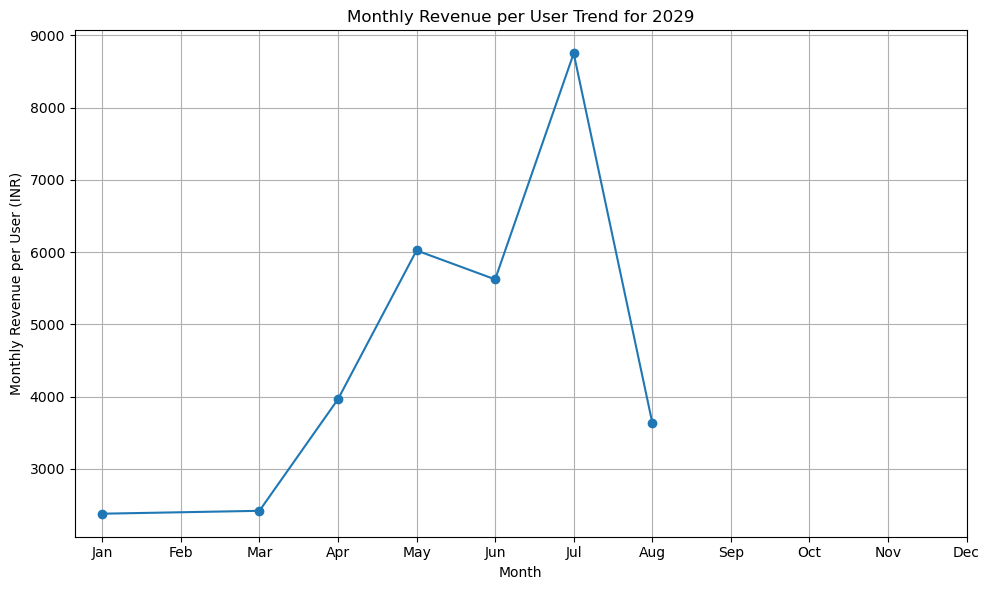

In [130]:
# Monthly Revenue per user
monthly_revenue_per_user = latest_year_data.groupby(latest_year_data['Month'].dt.month).apply(lambda x: x['Order Amount'].sum() / x['Cust ID'].nunique())

plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue_per_user.index, monthly_revenue_per_user, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Monthly Revenue per User (INR)')
plt.title(f'Monthly Revenue per User Trend for {latest_year}')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

## Customer Data Analysis

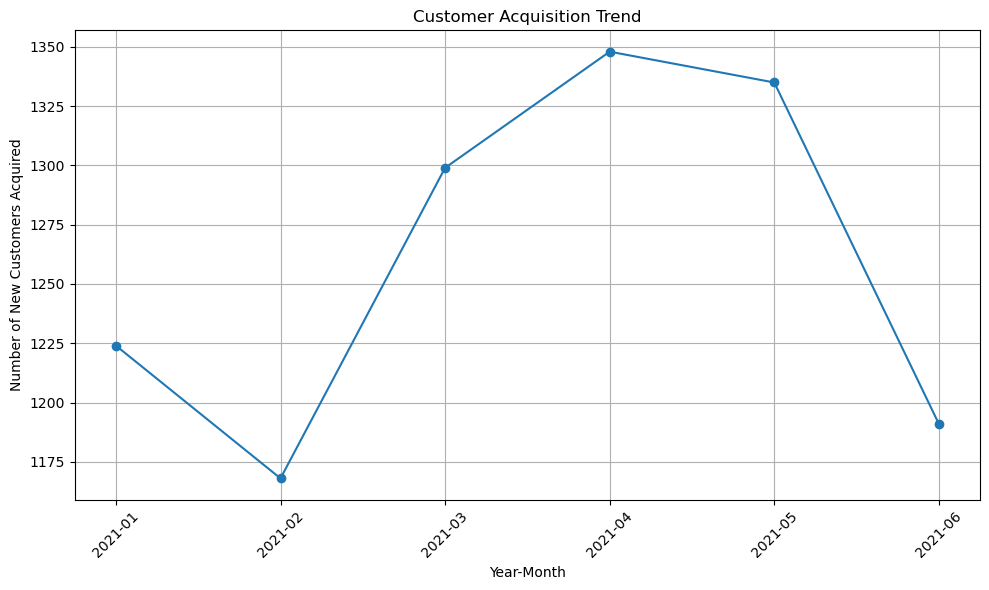

In [131]:
# User Acquisition 
customer_acquisition = df_customer.groupby('Month')['Cust Id'].nunique()

plt.figure(figsize=(10, 6))
plt.plot(customer_acquisition.index.astype(str), customer_acquisition, marker='o', linestyle='-')
plt.xlabel('Year-Month')
plt.ylabel('Number of New Customers Acquired')
plt.title('Customer Acquisition Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Observations
1. There has been constant fluctaution in customer acquistion with highest rate in April, 2021 and lowest so far in Feb, 2021.

## Potential Reasons
1. Dip in customer acquisition after the holiday rush could be one reason, if talking about retail businesses.
2. Potential competitor in the market with similar offerings so customers intend to move to and fro.
3. Constant R&D in the product might lead to several downtimes decreasing User Experience.

## Recommendations
1. Run post-holiday sales or promotions to entice customers who might still be in shopping mode. Offer discounts on leftover holiday inventory.
2. Reward loyal customers via Loyalty Programs; early access to new products, or points programs.
3. Highly invest in constantly innovating a differential factor to create USP in the product.

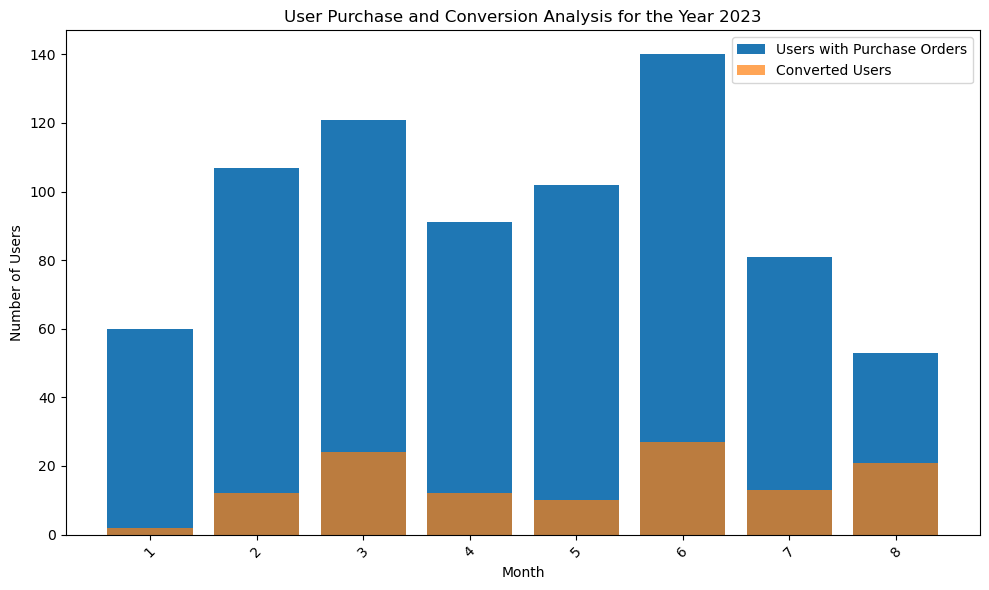

In [164]:
# User Purchase and Conversion Analysis

import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the year 2023
df_order_2023 = df_order[df_order['Month'].dt.year == 2023]

# Group the filtered data by month and count the number of unique users who placed a purchase order each month
user_order_per_month_2023 = df_order_2023.groupby(df_order_2023['Month'].dt.month)['Cust ID'].nunique()
converted_order_per_month_2023 = df_order_2023[df_order_2023['Order Status'] == 'Won'].groupby(df_order_2023['Month'].dt.month)['Cust ID'].nunique()

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(user_order_per_month_2023.index.astype(str), user_order_per_month_2023, label='Users with Purchase Orders')
plt.bar(converted_order_per_month_2023.index.astype(str), converted_order_per_month_2023, label='Converted Users', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.title('User Purchase and Conversion Analysis for the Year 2023')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

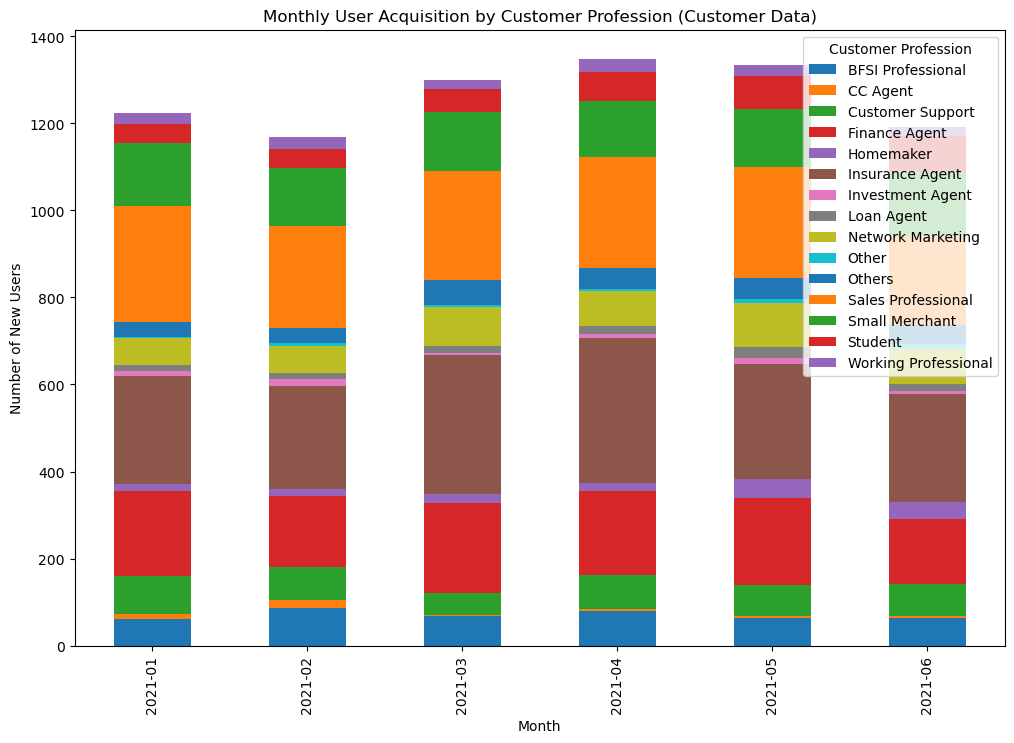

In [ ]:
# Monthly User acquisition by Profession

# Calculate the number of new users per month, bifurcated by customer profession
user_acquisition_by_profession = df_customer.groupby(['Month', 'Cust Profession'])['Cust Id'].nunique().unstack()

user_acquisition_by_profession.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.xlabel('Month')
plt.ylabel('Number of New Users')
plt.title('Monthly User Acquisition by Customer Profession (Customer Data)')
plt.legend(title='Customer Profession')
plt.show()

## Observations
1. People from certain professions like Students, CC Agent, Insurance Agent hold the larger portion of the userbase.
2. Sales professionals, Investment agents, Loan Agent hold, Homemaker the smallest share of userbase.

## Potential Reasons
1. Professions with larger userbases may have been early adopters of the product.
2. Relevance to specific use cases within different professions.

## Recommendations
1. Diversifying marketing strategies and conducting a thorugh market reasearch to address the pain points of smaller segements.
2. New Product Offerings relevant to wide variety of use cases irrespective of profession

# Cohort Analysis

In [136]:
df_order

,Order No,Cust ID,Order Date,Order Status,Order Amount,Month
0,4.260000e+18,6X894534,2001-01-21 00:36:00,Other,1581.5,2001-01
1,4.260000e+18,0WWO4742,2001-01-21 06:24:00,Other,1581.5,2001-01
2,4.260000e+18,V4OO4168,2001-01-21 06:47:00,Other,1581.5,2001-01
3,4.260000e+18,V4OO4168,2001-01-21 06:51:00,Other,1581.5,2001-01
4,4.260000e+18,Z8EA4622,2001-01-21 09:02:00,Other,1581.5,2001-01
...,...,...,...,...,...,...
30137,4.260000e+18,P1EB8125,2010-09-21 18:31:00,Other,1581.5,2010-09
30138,4.260000e+18,1PHO1300,2010-09-21 18:59:00,Other,1581.5,2010-09
30139,4.260000e+18,XKCB3000,2010-09-21 21:17:00,Other,1581.5,2010-09
30140,4.260000e+18,8Z802815,2010-09-21 21:35:00,Other,1581.5,2010-09


In [137]:
df_customer

,Cust Id,Customer Created Date,Week,Cust Profession,Month
0,6X894534,2021-01-01 00:23:41,"W1,2021",Insurance Agent,2021-01
1,8WTK1802,2021-01-01 01:16:11,"W1,2021",Sales Professional,2021-01
2,0WWO4742,2021-01-01 06:19:00,"W1,2021",Small Merchant,2021-01
3,V4OO4168,2021-01-01 06:32:11,"W1,2021",Finance Agent,2021-01
4,Z8EA4622,2021-01-01 08:42:21,"W1,2021",BFSI Professional,2021-01
...,...,...,...,...,...
7560,XWXO3727,2021-06-30 23:14:44,"W27,2021",Small Merchant,2021-06
7561,5N181580,2021-06-30 23:24:26,"W27,2021",Sales Professional,2021-06
7562,ZMX43668,2021-06-30 23:24:40,"W27,2021",Insurance Agent,2021-06
7563,8FBT8312,2021-06-30 23:32:26,"W27,2021",Small Merchant,2021-06


In [141]:
df_customer = df_customer.rename(columns={'Cust Id': 'Cust ID'})

In [152]:
# Convert Order Date column to datetime format
df_order['Order Date'] = pd.to_datetime(df_order['Order Date'])

# Extract cohort month from the Order Date
df_order['Cohort Month'] = df_order['Order Date'].dt.to_period('M')

# Filter data to include only cohorts from the year 2021
df_order_2021 = df_order[df_order['Cohort Month'].dt.year == 2021]

# Group by cohort month and order month, and calculate total revenue and number of users
cohort_data = df_order_2021.groupby(['Cohort Month', 'Order Month']).agg({
    'Cust ID': pd.Series.nunique,  # Count unique users
    'Order Amount': 'sum'
}).reset_index()

# Pivot the data to create a cohort table
cohort_table = cohort_data.pivot_table(index='Cohort Month', columns='Order Month', values=['Cust ID', 'Order Amount'])

# Fill missing values with 0
cohort_table = cohort_table.fillna(0)

# Rename the columns
new_columns = [(f'{name} ({metric})') for name, metric in cohort_table.columns]
cohort_table.columns = new_columns

# Display the cohort table
print(cohort_table)


              Cust ID (2021-01)  Cust ID (2021-02)  Cust ID (2021-03)  Cust ID (2021-04)  Cust ID (2021-05)  Cust ID (2021-06)  Cust ID (2021-07)  Cust ID (2021-08)  Order Amount (2021-01)  Order Amount (2021-02)  Order Amount (2021-03)  Order Amount (2021-04)  Order Amount (2021-05)  Order Amount (2021-06)  Order Amount (2021-07)  Order Amount (2021-08)
Cohort Month                                                                                                                                                                                                                                                                                                                                                        
2021-01       64.0               0.0                0.0                0.0                0.0                0.0                0.0                0.0                146360.5                0.0                     0.0                     0.0                     0.0                     

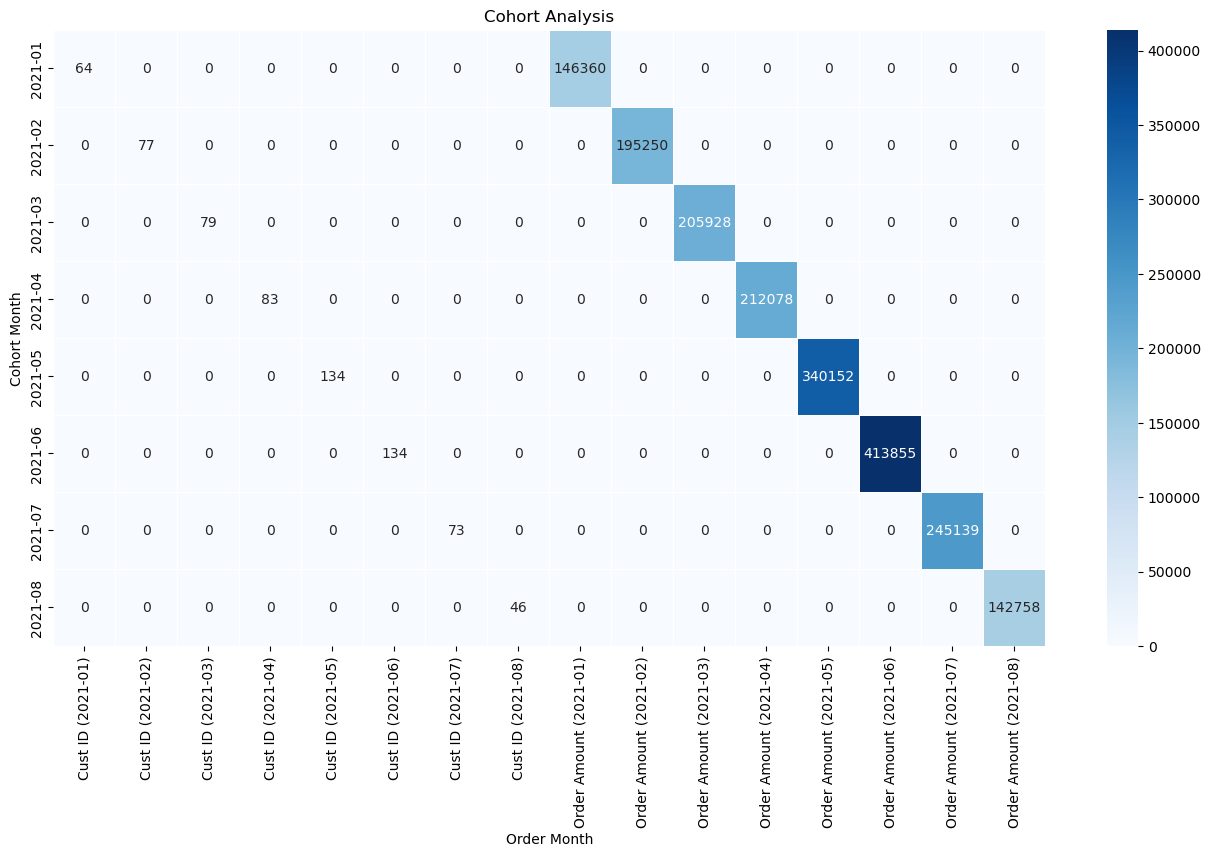

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(cohort_table, cmap='Blues', annot=True, fmt=".0f", linewidths=.5)
plt.title('Cohort Analysis')
plt.xlabel('Order Month')
plt.ylabel('Cohort Month')
plt.show()


## Consideration:
Cohort Months are the Months of the year 2021.

## Observations
1. There is a gradual increase in the number of customers over time, with the highest number observed in the later cohort months (May, June, July).
2. Order amounts also show a similar trend, with higher values observed in the later cohort months.
3. The number of customers and order amounts seem to peak in the mid to later months of 2021.

## Potential Reasons
1. Seasonal Trends: The increase in customers and order amounts in the later months could be due to seasonal factors, such as holidays, promotions, or special events.
2. Product Launches: The introduction of new products or services during certain months could have attracted more customers and boosted sales.
3. Economic Factors: Changes in economic conditions, consumer spending patterns, or market trends may have influenced customer behavior and purchasing decisions.
4. Post Covid Market: Stable increase in Customers and sales could be contributed to opening up of markets Post-Covid.

## Recommendations
1. Targeted Marketing: Analyze customer demographics, preferences, and behavior to tailor marketing campaigns and promotions effectively, targeting specific segments or personas.
2. Monitor Seasonal Trends: Anticipate and prepare for seasonal fluctuations in customer demand by planning targeted promotions, inventory management, and staffing accordingly.
3. Success Capitalization: Identify the strategies or initiatives that led to increased customer acquisition and sales in the later months and consider replicating or expanding them in future 